In [1]:
# 3rd party libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

# Local libraries
import RMOU_FMT_config as cf
from RMOU_FMT_utilities import Utilities
from RMOU_FMT_preprocessor import PrepData

In [2]:
# def exploratory_data_analysis(analytical_base_table):
   
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Read input file and understand the data
# "strength" is my dependent variable

input_instance = Utilities(cf.DATASET_PATH, cf.DATASET_NAME)
analytical_base_table = input_instance.load_data()
analytical_base_table.head(10)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
5   255.0    0.0    0.0  192.0           0.0      889.8    945.0   90   
6   166.8  250.2    0.0  203.5           0.0      975.6    692.6    7   
7   251.4    0.0  118.3  188.5           6.4     1028.4    757.7   56   
8   296.0    0.0    0.0  192.0           0.0     1085.0    765.0   28   
9   155.0  184.0  143.0  194.0           9.0      880.0    699.0   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29  
5     21.86  
6     15.75  
7     36.64  
8     21.65  
9     28.99

In [4]:
analytical_base_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
## Check for Null values:
analytical_base_table.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [6]:
## Check for zero values:
analytical_base_table.isin([0]).sum()

cement            0
slag            471
ash             566
water             0
superplastic    379
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

- 1030 observations with non-null's
- 8 numeric features (Independent variable) 
- 1 numeric feature. (Target variable)
- There are signiificant zeros in slag, ash and superplastic.
- Looking at the csv files, both ash and superplastic have zeros for the same instance(row). So there seems to exist some pattern on zero's between ash and superplastic.

In [7]:
## Descriptive Statistics- Univariate Analysis
analytical_base_table.describe().transpose()

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

- cement is biased on right with high range
- slag mean and mediun is far away. Its biased on the right. Has 0 value (probably use of cement without slag is also permissible - Domain specific)  
- ash is skewed with long tail on right as the mean and mediun is different. Is 0 a missing value or permissible one, as there are significant zero's.
- water seems to be near symentrical distributed curve.
- superplasticizer has 0 and is slightly larger distribution area on the right.
- coarse aggregate seems to be have symentrically distributed curve.
- fine aggregate seems to be near symentrical distributed curve.
- age - samples have more older cement 

In [8]:
## Convert the age field as categorical

df_copy = analytical_base_table.copy()
df_copy['age'] = df_copy['age'].astype("category")
df_copy.dtypes

cement           float64
slag             float64
ash              float64
water            float64
superplastic     float64
coarseagg        float64
fineagg          float64
age             category
strength         float64
dtype: object

## Let us do a pair plot analysis to visually check number of likely clusters

### This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
### The result can be stored as a .png file and opened in say, paint to get a larger view 


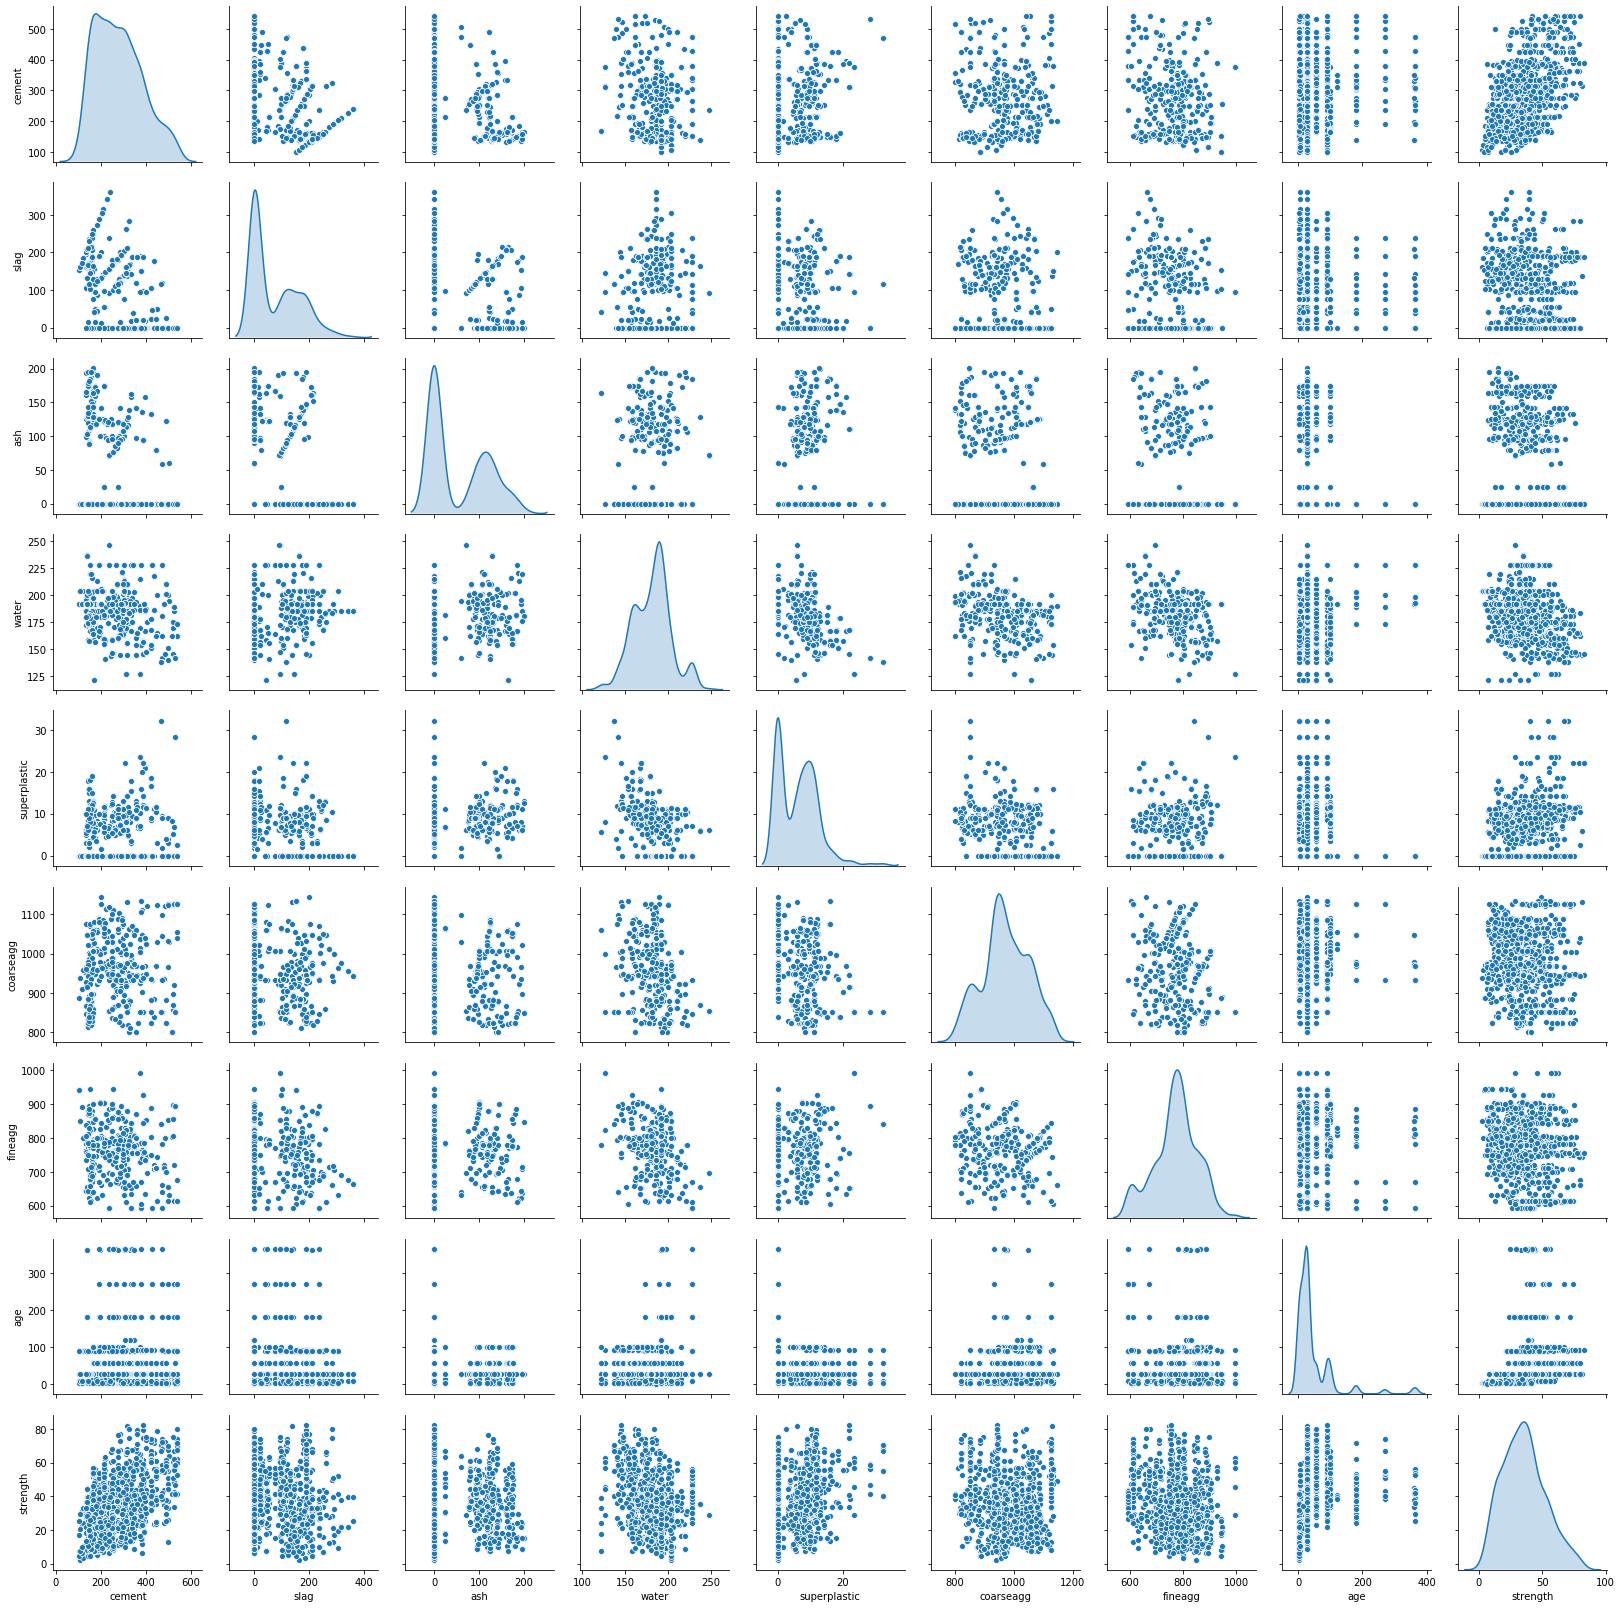

In [9]:
# Bivariate analysis:
sns.pairplot(analytical_base_table, diag_kind='kde')   # to plot density curve instead of histogram

<Figure size 1008x864 with 0 Axes>

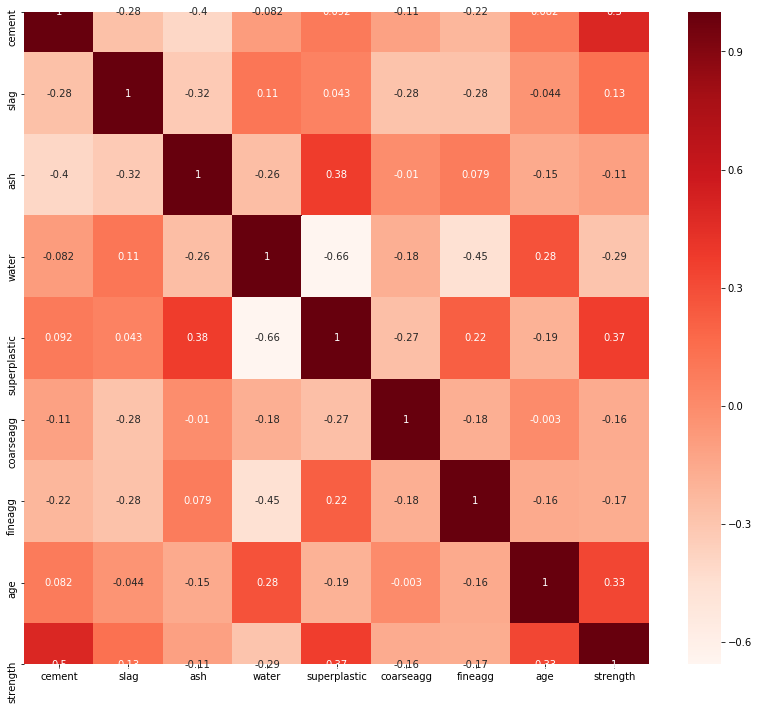

In [10]:
# Using Pearson coefficients to determine the relationship between other variables and strength.
plt.figure(figsize=(14,12))
cor = analytical_base_table.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

In [11]:
# From the heatmap, none of the attributes are good predictor of stength.
# Get correlation with output variable
cor_target = abs(cor["strength"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

cement          0.497832
superplastic    0.366079
age             0.328873
strength        1.000000
Name: strength, dtype: float64

In [12]:
# Assumption of linear regression is that the independent variables need to be uncorrelated with each other variables.
# If these variables are correlated with each other, then we need to keep only one of them and drop the rest.

print(analytical_base_table[["cement","superplastic"]].corr())
print(analytical_base_table[["cement","age"]].corr())
print(analytical_base_table[["superplastic","age"]].corr())

# Cement, Age and Superplastic correlation are very small.
# Hence we can consider these variables for our modeling.

                cement  superplastic
cement        1.000000      0.092386
superplastic  0.092386      1.000000
          cement       age
cement  1.000000  0.081946
age     0.081946  1.000000
              superplastic     age
superplastic        1.0000 -0.1927
age                -0.1927  1.0000


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

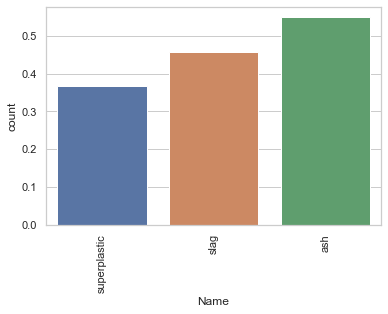

In [13]:
# Analysing the pattern in missing data
# import missingno as msno

# missingdata_df = analytical_base_table.columns[analytical_base_table.isin([0]).any()].tolist()
# msno.bar(analytical_base_table[missingdata_df], color="grey", log=False, figsize=(3,3))

missing_values = analytical_base_table.isin([0]).sum() / len(analytical_base_table)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)

# create a pandas dataframe of above result:

missing_values = missing_values.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index

# created two columns ("Name" and "count") in pandas dataframe. Finally, create a bar plot to represent missing values:

sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

In [14]:
# Find Outliers using IQR :

print('(Column name , low fence # high fence # skewness)')
outliers_dict = PrepData(analytical_base_table, 'strength').find_outliers().outlier_dict
for item in outliers_dict.items():
    print(item)
  

(Column name , low fence # high fence # skewness)
('cement', (-44.0625, 586.4375, 0.5094811788717731))
('slag', (-214.42499999999998, 357.375, 0.8007168956061774))
('ash', (-177.45, 295.75, 0.5373539058066844))
('water', (124.25000000000001, 232.64999999999998, 0.07462838428549402))
('superplastic', (-15.299999999999999, 25.5, 0.9072025748672466))
('coarseagg', (785.8999999999999, 1175.5000000000002, -0.04021974481106704))
('fineagg', (591.3749999999998, 963.575, -0.25300959769707143))
('age', (-66.5, 129.5, 3.2691774006345895))
('strength', (-9.927500000000013, 79.77250000000001, 0.41697728841071807))


In [15]:
df_analyse_outliers = analytical_base_table.copy()

df_analyse_outliers['superplastic'].skew()
df_analyse_outliers['superplastic'] = PrepData(analytical_base_table, 'strength').fill_outliers_floor_capp(df_analyse_outliers, 'superplastic', floor=0.25, capp=0.75)
df_analyse_outliers['superplastic'].skew()

df_analyse_outliers['age'].skew()
df_analyse_outliers['age'] = PrepData(analytical_base_table, 'strength').fill_outliers_floor_capp(df_analyse_outliers, 'age', floor=0.25, capp=0.75)
df_analyse_outliers['age'].skew()

0.9072025748672466

-0.18207727565954476

3.2691774006345895

0.32556841234698664

Applying K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 0, 'k')

Text(0, 0.5, 'Average distortion')

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

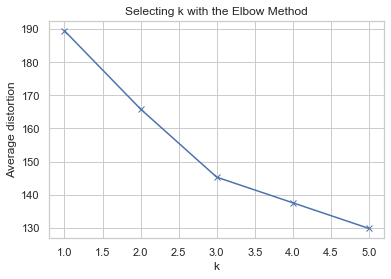

In [16]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

clusters=range(1,6)
meanDistortions=[]
df_copy = analytical_base_table.copy()

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_copy)
    prediction=model.predict(df_copy)
    meanDistortions.append(sum(np.min(cdist(df_copy, model.cluster_centers_, 'euclidean'), axis=1)) / df_copy.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [17]:
# Let us first start with K = 2
final_model=KMeans(2)
df_kmeans_2 = analytical_base_table.copy()
final_model.fit(df_kmeans_2)
prediction=final_model.predict(df_kmeans_2)

#Append the prediction 
df_kmeans_2["GROUP"] = prediction
df_kmeans_2.head(10)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
5   255.0    0.0    0.0  192.0           0.0      889.8    945.0   90   
6   166.8  250.2    0.0  203.5           0.0      975.6    692.6    7   
7   251.4    0.0  118.3  188.5           6.4     1028.4    757.7   56   
8   296.0    0.0    0.0  192.0           0.0     1085.0    765.0   28   
9   155.0  184.0  143.0  194.0           9.0      880.0    699.0   28   

   strength  GROUP  
0     29.89      0  
1     23.51      0  
2     29.22      0  
3     45.85      1  
4     18.29      0  
5     21.86      0  
6     15.75      0  
7     36.64      0  
8     21.65      1  
9     28.99      0

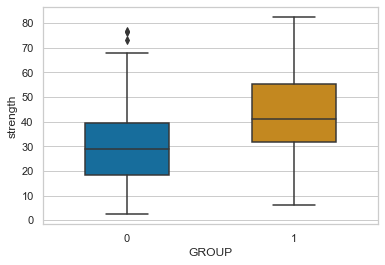

In [18]:
# Visualising the cluster for k=2
sns.boxplot(x=df_kmeans_2.GROUP, y=df_kmeans_2["strength"],data=df_kmeans_2,width=0.5,palette="colorblind")

# Inferences - Usage of cement clearly shows 2 different clusters.
# slag, ash and water does not make much difference.
# strength - the distribution of data slightly overlaps

In [19]:
# Let us analyse with K = 3
final_model=KMeans(3)
df_kmeans_3 = analytical_base_table.copy()
final_model.fit(df_kmeans_3)
prediction=final_model.predict(df_kmeans_3)

#Append the prediction 
df_kmeans_3["GROUP"] = prediction
df_kmeans_3.head(10)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
5   255.0    0.0    0.0  192.0           0.0      889.8    945.0   90   
6   166.8  250.2    0.0  203.5           0.0      975.6    692.6    7   
7   251.4    0.0  118.3  188.5           6.4     1028.4    757.7   56   
8   296.0    0.0    0.0  192.0           0.0     1085.0    765.0   28   
9   155.0  184.0  143.0  194.0           9.0      880.0    699.0   28   

   strength  GROUP  
0     29.89      2  
1     23.51      0  
2     29.22      0  
3     45.85      2  
4     18.29      2  
5     21.86      0  
6     15.75      2  
7     36.64      0  
8     21.65      0  
9     28.99      2

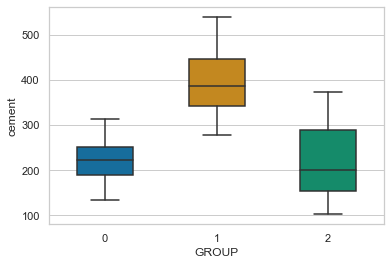

In [20]:
# Visualising the cluster for k=3
sns.boxplot(x=df_kmeans_3.GROUP, y=df_kmeans_3["cement"],data=df_kmeans_3,width=0.5,palette="colorblind")

# Inferences - The degree of seperation between Group 0 and Group 2 is 0.
# Hence going for 2 cluster.

In [21]:
# Split the dataset based on Groups:

df_group_0 = df_kmeans_2[df_kmeans_2['GROUP']==0]
df_group_1 = df_kmeans_2[df_kmeans_2['GROUP']==1]
df_cluster_0 = df_group_0.loc[:, df_group_0.columns != 'GROUP'].reset_index(drop=True)
df_cluster_1 = df_group_1.loc[:, df_group_1.columns != 'GROUP'].reset_index(drop=True)

# df_cluster_inst_0 = PrepData(df_cluster_0, 'strength')
X_train_0, X_test_0, y_train_0, y_test_0 = PrepData(df_cluster_0, 'strength').split_df_train_test(cf.TEST_SIZE, cf.SPLIT_RANDOM_STATE)
X_train_1, X_test_1, y_train_1, y_test_1 = PrepData(df_cluster_1, 'strength').split_df_train_test(cf.TEST_SIZE, cf.SPLIT_RANDOM_STATE)

X_train_1.head(2)

cement  slag  ash  water  superplastic  coarseagg  fineagg  age
256   325.0   0.0  0.0  184.0           0.0     1063.0    783.0   28
284   310.0   0.0  0.0  192.0           0.0     1012.0    830.0    3

Define Pipelines - Column Selection

In [22]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)

        try:
            return X[self.columns]
        except KeyError:
            cols_error = list(set(self.columns) - set(X.columns))
            raise KeyError("The DataFrame does not include the columns: %s" % cols_error)

In [23]:
class TypeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, dtype):
        self.dtype = dtype

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X.select_dtypes(include=[self.dtype])
    

In [24]:
class ImputeOutliers(BaseEstimator, TransformerMixin):
    def __init__(self,floor,capp):
        self.floor = floor
        self.capp  = capp

    def fit(self, X, y=None):
        return self
    
    def fill_outliers(self, df, col_name):
        q1 = df[col_name].quantile(self.floor)
#         print(q1)
        q3 = df[col_name].quantile(self.capp)
#         print(q3)
        df[col_name] = np.where((df[col_name] < q1), q1, df[col_name])
        df[col_name] = np.where((df[col_name] > q3), q3, df[col_name])
        return df[col_name]

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        for column in X.columns:
#             print(column)
            if column in ["age"]:
                 X[column] = self.fill_outliers(X,column)
            
        return X

In [25]:
# Verify if the above class is working:
# X_train_0.head()
# X_train_0['age'].skew()
# io = ImputeOutliers(0.25,0.75)
# after=io.transform(X_train_0)
# after['age'].skew()

In [26]:
def pipeline_linear_regression():

    model_pipeline_linear = make_pipeline(
        ColumnSelector(columns=["cement", "superplastic", "age"]),
        FeatureUnion(transformer_list=[
            ("numeric_features", make_pipeline(
                TypeSelector("float64"),
                SimpleImputer(strategy="median"),
                StandardScaler()
            )),
            ("categorical_features", make_pipeline(
                TypeSelector("category"),
                ImputeOutliers(0.25,0.75)
            )),
        ]),
        LinearRegression()
    )
    
    cluster_train_list = [(X_train_0,y_train_0,X_test_0,y_test_0),(X_train_1,y_train_1,X_test_1,y_test_1)]

    for (X_train,y_train,X_test,y_test) in cluster_train_list:
        # Fit all the transforms one after the other and transform the data,then fit the transformed data using the final estimator.
        model_pipeline_linear.fit(X_train,y_train)
        # Get the Coefficients 
        print("The coefficients for Simple LinearRegression are {}".format(model_pipeline_linear.named_steps['linearregression'].coef_))
        # Intercept for the model
        print("The intercept for Simple LinearRegression is {}".format(model_pipeline_linear.named_steps['linearregression'].intercept_))
        # Overall accuracy score
        print("The acccuracy score for Simple LinearRegression is {}".format(model_pipeline_linear.score(X_test, y_test)))
        # Apply transforms to the data, fit and predict with the final estimator
        model_pipeline_linear.fit(X_test,y_test)
        X_test_predict = model_pipeline_linear.predict(X_test)
        # Root Mean Squared Error on train and test date
        print('RMSE on test data: ',  np.sqrt(mean_squared_error(y_test, X_test_predict)))
        # Model score - R2 or coeff of determinant
        # R^2=1–RSS / TSS =  RegErr / TSS
        print('R2 score: ', r2_score(y_test, X_test_predict))
        
   

In [27]:
pipeline_linear_regression() 

The coefficients for Simple LinearRegression are [3.6488616  4.03553047]
The intercept for Simple LinearRegression is 29.803705583756347
The acccuracy score for Simple LinearRegression is 0.24255972562422268
RMSE on test data:  12.392275071769486
R2 score:  0.25692921070090224
The coefficients for Simple LinearRegression are [4.52775918 6.4477187 ]
The intercept for Simple LinearRegression is 43.32638036809816
The acccuracy score for Simple LinearRegression is 0.2920101196482834
RMSE on test data:  13.712909298490956
R2 score:  0.2944294849811888


Model Pipeline

In [28]:
def pipeline_polynomial_regression(degree):
    model_pipeline_polynomial = make_pipeline(
        ColumnSelector(columns=["cement", "superplastic", "age"]),
        FeatureUnion(transformer_list=[
            ("numeric_features", make_pipeline(
                TypeSelector("float64"),
                SimpleImputer(strategy="median"),
                StandardScaler()
            )),
            ("categorical_features", make_pipeline(
                TypeSelector("category"),
                ImputeOutliers(0.25,0.75)
            )),
        ]),
        PolynomialFeatures(degree=degree),
        LinearRegression()
    )
    
    cluster_train_list = [(X_train_0,y_train_0,X_test_0,y_test_0),(X_train_1,y_train_1,X_test_1,y_test_1)]

    for (X_train,y_train,X_test,y_test) in cluster_train_list:
        # Fit all the transforms one after the other and transform the data,then fit the transformed data using the final estimator.
        model_pipeline_polynomial.fit(X_train,y_train)
        # Get the Coefficients 
        print("The coefficients for Polynomial Regression are {}".format(model_pipeline_polynomial.named_steps['linearregression'].coef_))
        # Intercept for the model
        print("The intercept for Polynomial Regression is {}".format(model_pipeline_polynomial.named_steps['linearregression'].intercept_))
        # Overall accuracy score
        print("The acccuracy score for Polynomial Regression is {}".format(model_pipeline_polynomial.score(X_test, y_test)))
        # Apply transforms to the data, fit and predict with the final estimator
        model_pipeline_polynomial.fit(X_test,y_test)
        X_test_predict = model_pipeline_polynomial.predict(X_test)
        # Root Mean Squared Error on train and test date
        print('RMSE on test data: ',  np.sqrt(mean_squared_error(y_test, X_test_predict)))
        # Model score - R2 or coeff of determinant
        # R^2=1–RSS / TSS =  RegErr / TSS
        print('R2 score: ', r2_score(y_test, X_test_predict))

In [29]:
pipeline_polynomial_regression(6)

The coefficients for Polynomial Regression are [-2.31641680e+13 -3.83827455e+00  3.45965564e+00 -3.32108821e+00
  2.26690030e+01 -6.40115879e+00 -5.39777062e+00 -4.39922629e+00
 -7.20720105e+00  1.82253769e+01  6.42986550e+00 -1.05595527e+00
  1.27470291e+01  1.00755556e+00 -7.36965701e-01  2.85516144e+00
 -3.81852745e+00 -2.93883905e+00  7.98489304e+00  9.70538594e+00
 -1.06288832e+01 -2.44207547e+00  3.16651925e+00  1.14274435e-01
 -5.39489504e+00 -7.04694573e+00 -4.16406031e+00  3.19127351e+00]
The intercept for Polynomial Regression is 23164168003209.008
The acccuracy score for Polynomial Regression is 0.04358978341016251
RMSE on test data:  11.17089505063171
R2 score:  0.3961847982030141
The coefficients for Polynomial Regression are [ 6.56243055e-13 -6.59429605e+00  1.44082891e+01 -1.68361376e+01
  5.70799370e+00 -3.97492801e+01  1.37282092e+01 -1.54043054e+01
 -4.02537786e+00  1.11308368e+00  4.83376355e+00  1.63689831e+01
  2.37410391e+01 -2.16701473e+01  1.94260414e+01 -4.3524

In [30]:
# Predicting using Random Forest Regressor:

def pipeline_random_forest_regressor():
    model_pipeline_random_forest = make_pipeline(
        ColumnSelector(columns=["cement", "superplastic", "age"]),
        FeatureUnion(transformer_list=[
            ("numeric_features", make_pipeline(
                TypeSelector("float64"),
                SimpleImputer(strategy="median"),
                StandardScaler()
            )),
            ("categorical_features", make_pipeline(
                TypeSelector("category"),
                ImputeOutliers(0.25,0.75)
            )),
        ]),
        RandomForestRegressor(max_depth=5,random_state=2)
    )
    
    cluster_train_list = [(X_train_0,y_train_0,X_test_0,y_test_0),(X_train_1,y_train_1,X_test_1,y_test_1)]

    for (X_train,y_train,X_test,y_test) in cluster_train_list:
        # Fit all the transforms one after the other and transform the data,then fit the transformed data using the final estimator.
        model_pipeline_random_forest.fit(X_train,y_train)
        # Overall accuracy score
        print("The acccuracy score for Random Forest is {}".format(model_pipeline_random_forest.score(X_test, y_test)))
        # Apply transforms to the data, fit and predict with the final estimator
        model_pipeline_random_forest.fit(X_test,y_test)
        X_test_predict = model_pipeline_random_forest.predict(X_test)
        # Root Mean Squared Error on train and test date
        print('RMSE on test data: ',  np.sqrt(mean_squared_error(y_test, X_test_predict)))
        # Model score - R2 or coeff of determinant
        # R^2=1–RSS / TSS =  RegErr / TSS
        print('R2 score: ', r2_score(y_test, X_test_predict))
        
        # Get the list of parameters of the Random Forest
        print('Random Forest parm: ', model_pipeline_random_forest.named_steps['randomforestregressor'].get_params())

In [31]:
pipeline_random_forest_regressor()

The acccuracy score for Random Forest is 0.16710434067819369
RMSE on test data:  9.561222202394058
R2 score:  0.5576613155737753
Random Forest parm:  {'bootstrap': True, 'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 2, 'verbose': 0, 'warm_start': False}
The acccuracy score for Random Forest is 0.3551633842681374
RMSE on test data:  10.931887290220434
R2 score:  0.5515939044374006
Random Forest parm:  {'bootstrap': True, 'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 2, 'verbose': 0, 'warm_start': Fal

Observation:
            Using Random forest 55 percent of the variance in strength can be explained using the variables - cement, superplastic, age.
            The prediction is better than the polynomial. 

In [32]:
# Hyperparameters Tunning using Grid search cross-validation for Random Forest


# 1. Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)
# 2. Minimum number of samples required to split a node
min_samples_split = [20, 50, 100]
# 3. Minimum number of samples required at each leaf node
min_samples_leaf = [20, 50, 100, 150]
# 4. Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# 5. Number of features to consider at every split
max_features = ['auto', 'sqrt']
# 6. Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_param_grid = {'randomforestregressor__n_estimators': n_estimators,
               'randomforestregressor__max_features': max_features,
               'randomforestregressor__max_depth': max_depth,
               'randomforestregressor__min_samples_split': min_samples_split,
               'randomforestregressor__min_samples_leaf': min_samples_leaf,
               'randomforestregressor__bootstrap': bootstrap}
print(random_param_grid)

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

{'randomforestregressor__n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'randomforestregressor__max_features': ['auto', 'sqrt'], 'randomforestregressor__max_depth': [2, 4, 6, 8, 10, None], 'randomforestregressor__min_samples_split': [20, 50, 100], 'randomforestregressor__min_samples_leaf': [20, 50, 100, 150], 'randomforestregressor__bootstrap': [True, False]}


In [33]:
from sklearn.model_selection import RandomizedSearchCV
def pipeline_random_forest_hyperparm_tune():
    pipe_random_forest = make_pipeline(
        ColumnSelector(columns=["cement", "superplastic", "age"]),
        FeatureUnion(transformer_list=[
            ("numeric_features", make_pipeline(
                TypeSelector("float64"),
                SimpleImputer(strategy="median"),
                StandardScaler()
            )),
            ("categorical_features", make_pipeline(
                TypeSelector("category"),
                ImputeOutliers(0.25,0.75)
            )),
        ]),
        RandomForestRegressor()
       )
    random_search = RandomizedSearchCV(estimator = pipe_random_forest, param_distributions = random_param_grid, n_iter = 50, cv = 3, verbose=2, random_state=2, n_jobs = -1)
    
    cluster_train_list = [(X_train_0,y_train_0,X_test_0,y_test_0),(X_train_1,y_train_1,X_test_1,y_test_1)]

    for (X_train,y_train,X_test,y_test) in cluster_train_list:
        # Fit the random search model
        random_search.fit(X_train,y_train)
        # View the best parameters from fitting the random search
        print('Random Forest best parm: ',random_search.best_params_)
        best_grid = random_search.best_estimator_
        print('Best grid: ',best_grid)
        grid_accuracy = evaluate(best_grid, X_test, y_test)

In [34]:
pipeline_random_forest_hyperparm_tune()

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   20.5s finished
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Random Forest best parm:  {'randomforestregressor__n_estimators': 200, 'randomforestregressor__min_samples_split': 20, 'randomforestregressor__min_samples_leaf': 20, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__max_depth': 10, 'randomforestregressor__bootstrap': True}
Best grid:  Pipeline(memory=None,
         steps=[('columnselector',
                 ColumnSelector(columns=['cement', 'superplastic', 'age'])),
                ('featureunion',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('numeric_features',
                                                 Pipeline(memory=None,
                                                          steps=[('typeselector',
                                                                  TypeSelector(dtype='float64')),
                                                                 ('simpleimputer',
                                                                  SimpleImputer(

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   17.6s finished
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Random Forest best parm:  {'randomforestregressor__n_estimators': 1000, 'randomforestregressor__min_samples_split': 20, 'randomforestregressor__min_samples_leaf': 20, 'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__max_depth': 10, 'randomforestregressor__bootstrap': False}
Best grid:  Pipeline(memory=None,
         steps=[('columnselector',
                 ColumnSelector(columns=['cement', 'superplastic', 'age'])),
                ('featureunion',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('numeric_features',
                                                 Pipeline(memory=None,
                                                          steps=[('typeselector',
                                                                  TypeSelector(dtype='float64')),
                                                                 ('simpleimputer',
                                                                  SimpleImpute

In [35]:
# Cluster 2 GridsearchCV Accuracy
grid_accuracy_cluster2=67.59
# Cluster 2 Polynomial Accuracy
base_accuracy_cluster2=24.34
print('Cluster 2 - Improvement of {:0.2f}% accuracy'.format( 100 * (grid_accuracy_cluster2 - base_accuracy_cluster2) / base_accuracy_cluster2))
grid_accuracy_cluster1=47.55
base_accuracy_cluster1=22.57
print('Cluster 1 - Improvement of {:0.2f}% accuracy'.format( 100 * (grid_accuracy_cluster1 - base_accuracy_cluster1) / base_accuracy_cluster1))

Cluster 2 - Improvement of 177.69% accuracy
Cluster 1 - Improvement of 110.68% accuracy


In [36]:
# Predicting using Lasso regularisation:

from sklearn.linear_model import Lasso

def pipeline_lasso_regularisation():
    
    # Hyperparameters Tunning using Grid search cross-validation for Lasso regression

    # 1. Biased values (λ)
    lasso_params = {'lasso__alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}

    print(lasso_params)

    pipe_lasso_regular = make_pipeline(
            ColumnSelector(columns=["cement", "superplastic", "age"]),
            FeatureUnion(transformer_list=[
                ("numeric_features", make_pipeline(
                    TypeSelector("float64"),
                    SimpleImputer(strategy="median"),
                    StandardScaler()
                )),
                ("categorical_features", make_pipeline(
                    TypeSelector("category"),
                    ImputeOutliers(0.25,0.75)
                )),
            ]),
            Lasso(normalize=True)
        )

    lasso_search = RandomizedSearchCV(estimator = pipe_lasso_regular, param_distributions = lasso_params, n_iter = 50, cv = 3, verbose=2, random_state=2, n_jobs = -1)
    
    cluster_train_list = [(X_train_0,y_train_0,X_test_0,y_test_0),(X_train_1,y_train_1,X_test_1,y_test_1)]

    for (X_train,y_train,X_test,y_test) in cluster_train_list:
        # Fit the random search model
        lasso_search.fit(X_train,y_train)
        # View the best parameters from fitting the random search
        print('Lasso best parm: ',lasso_search.best_params_)
        best_grid = lasso_search.best_estimator_
        print('Lasso Best grid: ',best_grid)
        grid_accuracy = evaluate(best_grid, X_test, y_test)
        

In [37]:
pipeline_lasso_regularisation()

{'lasso__alpha': [0.02, 0.024, 0.025, 0.026, 0.03]}
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Lasso best parm:  {'lasso__alpha': 0.02}
Lasso Best grid:  Pipeline(memory=None,
         steps=[('columnselector',
                 ColumnSelector(columns=['cement', 'superplastic', 'age'])),
                ('featureunion',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('numeric_features',
                                                 Pipeline(memory=None,
                                                          steps=[('typeselector',
                                                                  TypeSelector(dtype='float64')),
                                                                 ('simpleimputer',
                                                                  SimpleImputer(add_indicator=False,
                                                                                copy=True,
                        

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Lasso best parm:  {'lasso__alpha': 0.02}
Lasso Best grid:  Pipeline(memory=None,
         steps=[('columnselector',
                 ColumnSelector(columns=['cement', 'superplastic', 'age'])),
                ('featureunion',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('numeric_features',
                                                 Pipeline(memory=None,
                                                          steps=[('typeselector',
                                                                  TypeSelector(dtype='float64')),
                                                                 ('simpleimputer',
                                                                  SimpleImputer(add_indicator=False,
                                                                                copy=True,
                                                                                fill_value=None,
                                       

[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.1s finished


In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

def pipeline_PCA():
    pipe_PCA = make_pipeline(
        StandardScaler(),
        PCA(),
        LinearRegression()
       )
    grid_param_grid = {'pca__n_components': [2, 4, 6, 7, 8]}
    grid_search = GridSearchCV(pipe_PCA, grid_param_grid, n_jobs = -1)
    
    cluster_train_list = [(X_train_0,y_train_0,X_test_0,y_test_0),(X_train_1,y_train_1,X_test_1,y_test_1)]

    for (X_train,y_train,X_test,y_test) in cluster_train_list:
        # Fit the random search model
        grid_search.fit(X_train,y_train)
        # View the best parameters from fitting the random search
        print('Random Forest best parm: ',grid_search.best_params_)
        best_grid = grid_search.best_estimator_
        print('Best grid: ',best_grid)
        grid_accuracy = evaluate(best_grid, X_test, y_test)

In [48]:
pipeline_PCA()

Random Forest best parm:  {'pca__n_components': 8}
Best grid:  Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=8,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)
Model Performance
Average Error: 6.4744 degrees.
Accuracy = 69.12%.
Random Forest best parm:  {'pca__n_components': 8}
Best grid:  Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=8,
                     random_state=None, svd_solver

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
